<a href="https://colab.research.google.com/github/DhawalKhandait/OIBSIP/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oasis Infobyte : Data Science Internship


# Task 5 : Sales Prediction Using Python


# Name of Intern: Dhawal Subhash Khandait


# Batch :- March 2023


# Loading Data and library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load Data
data=pd.read_csv("/content/drive/MyDrive/Oasis Infobyte/Sales Prediction Using Python/Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# top 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Last 5 rows
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
# Data set Rows & Columns count
data.shape

(200, 5)

In [7]:
# Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# Dataset columns
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
# Dataset describe
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
# Finding null values or missing values
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [11]:
# Total duplicated data
data.duplicated().sum()

0

# Exploratory Data Analysis


In [12]:
# Correlation between data
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<ipython-input-13-ea10e9988092>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


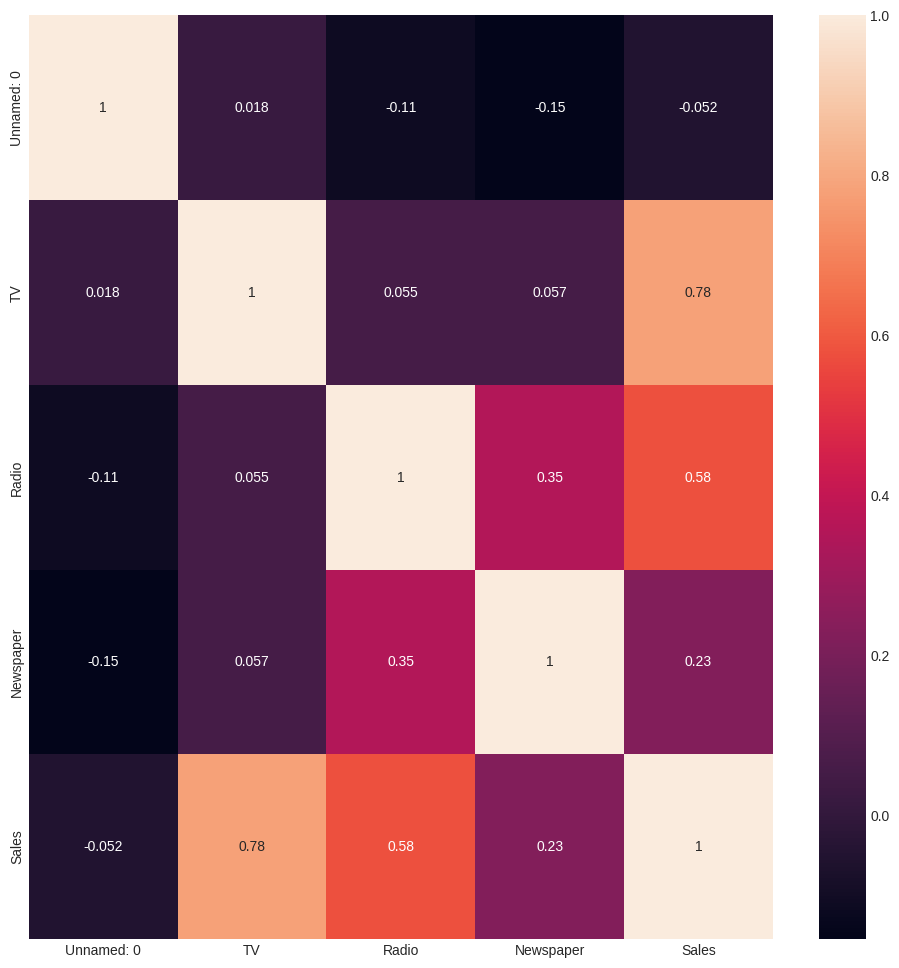

In [13]:
# Analysis Graph 1
# correlation in data
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has bee

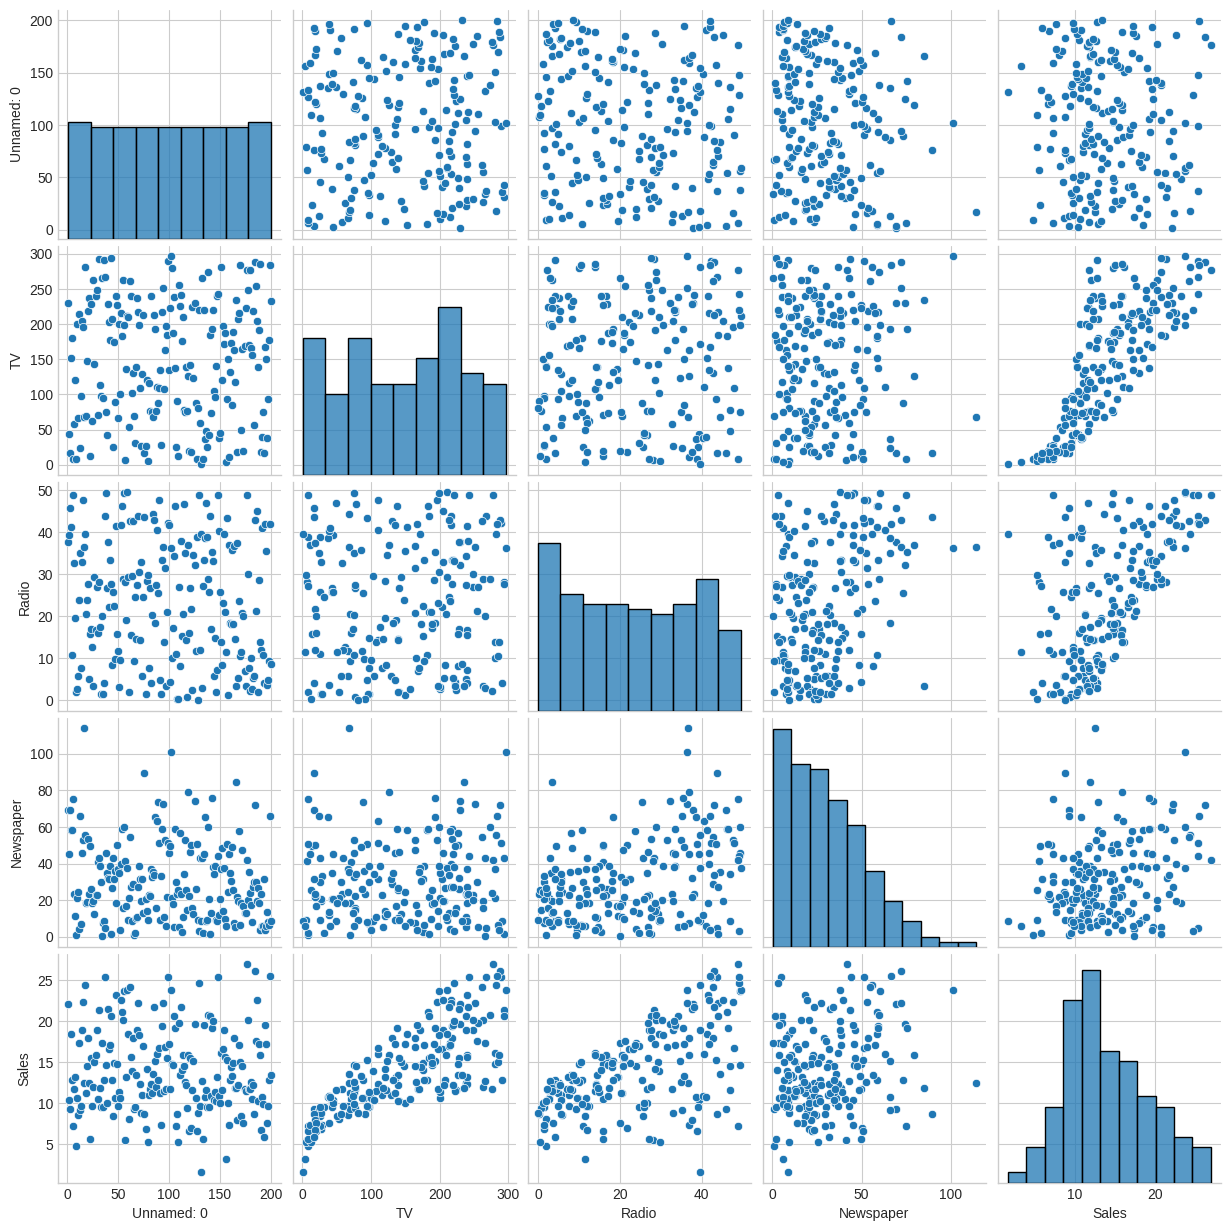

In [14]:
# Analysis Graph 2
# pairplot
sns.pairplot(data,palette="hls")

<Axes: ylabel='Sales'>

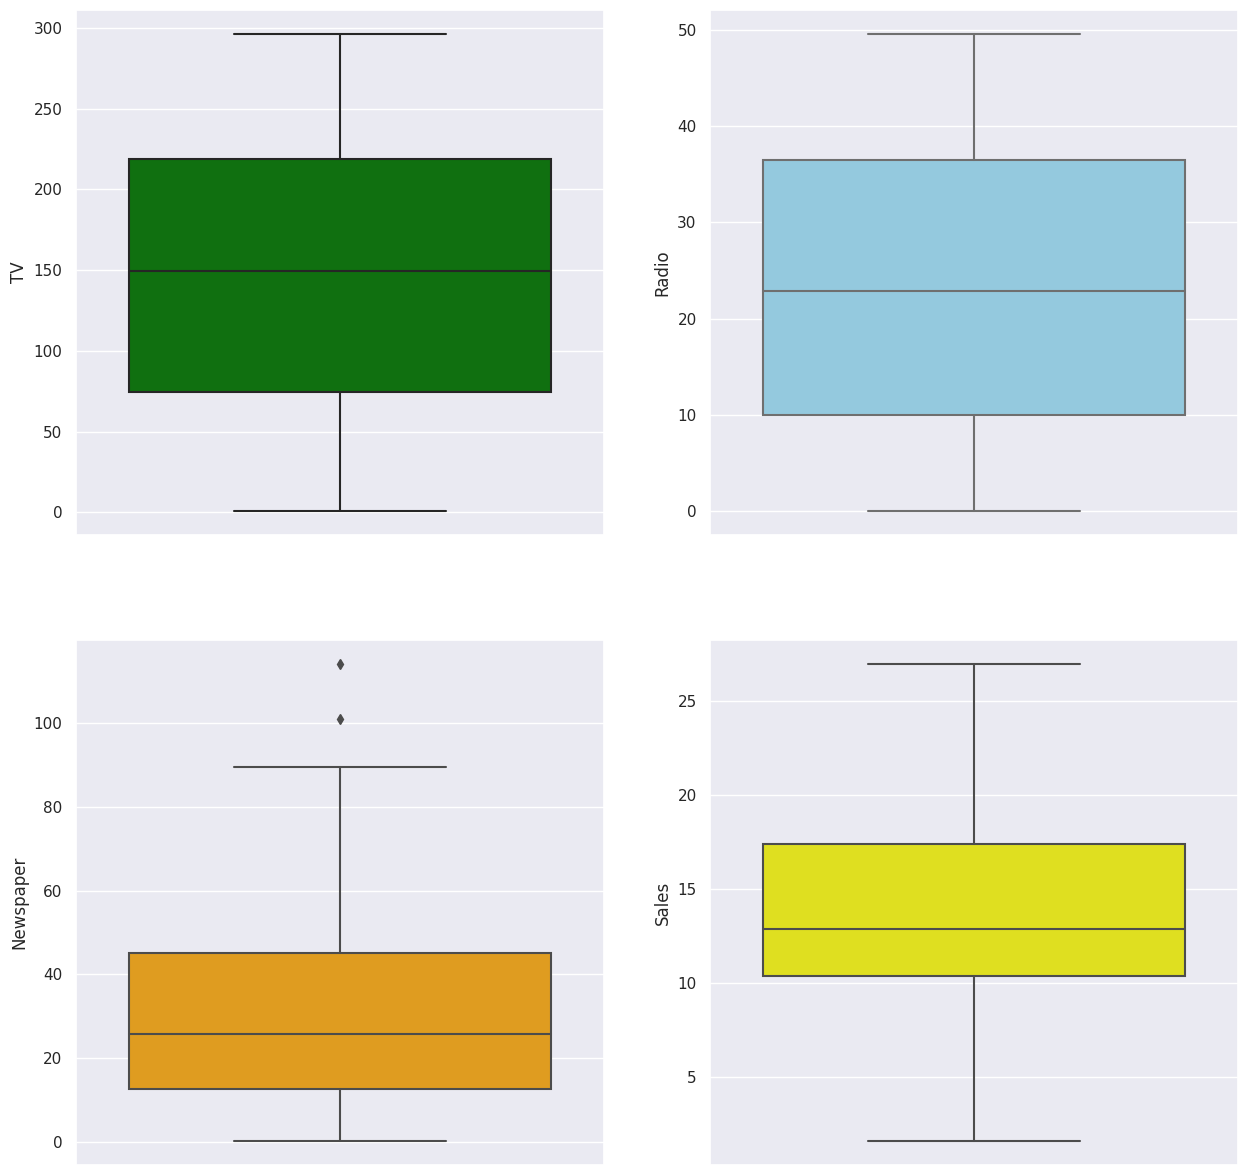

In [15]:
# Analysis Graph 3
# Box Plot
sns.set(style= "darkgrid")
fig,axs1=plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=data,y="TV",ax=axs1[0,0],color='green')
sns.boxplot(data=data,y="Radio",ax=axs1[0,1],color='skyblue')
sns.boxplot(data=data,y="Newspaper",ax=axs1[1,0],color='orange')
sns.boxplot(data=data,y="Sales",ax=axs1[1,1],color='yellow')

# Data Pre-processing


In [16]:
data=data.drop(columns=['Unnamed: 0'])


# Splitting Feactures and Target


In [17]:
x=data.drop(["Sales"],1)


<ipython-input-17-9d2e25556662>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=data.drop(["Sales"],1)


In [18]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
x.head()


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
y=data["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting data into Train and Test


In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [23]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [24]:
print(x.shape,X_train.shape,X_test.shape)


(200, 3) (160, 3) (40, 3)


# Standarization

In [25]:
x.describe()


,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
X_train_std=sc.fit_transform(X_train)
X_train_std

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [28]:
X_test_std=sc.fit_transform(X_test)
X_test_std

array([[ 0.31169191,  0.45489058,  0.74818001],
       [ 0.66693106,  1.5346898 ,  0.74818001],
       [ 1.74592846,  0.23356527,  0.38371819],
       [-1.36601071,  0.81035243,  0.45886496],
       [ 0.94249039,  1.62187856, -1.11921718],
       [-0.66438573,  0.68292271,  0.74066534],
       [ 0.90375715,  1.27983036, -0.21745596],
       [-0.94215839, -0.88647493, -0.54810174],
       [ 0.96573034, -1.43643478, -0.74724068],
       [ 0.44227827, -0.15543073, -0.05589041],
       [-1.14689123, -0.01458735, -1.15679057],
       [-0.87354523, -1.28217775, -0.1235225 ],
       [ 1.09963668, -1.43643478,  1.94677097],
       [-1.43573054,  0.34087451, -0.8862622 ],
       [ 0.04830588, -1.52362354, -0.23999999],
       [ 0.38805173, -1.14133437,  0.08313111],
       [-1.41470392,  0.22015161,  0.3160861 ],
       [ 0.69127767, -0.10177611, -0.70590996],
       [-0.6621724 , -0.30298093, -0.01831702],
       [ 1.13172994,  0.17991065, -0.82614479],
       [ 1.04430348,  0.50183837,  1.548

# Model Building


In [29]:
model= LinearRegression()

In [30]:
model.fit(X_train_std,y_train)


LinearRegression()

In [31]:
model.predict(X_test_std)


array([16.58534325, 20.93766365, 21.34568189, 11.24650542, 22.11385227,
       13.54751052, 21.06342583,  8.04754087, 13.68240487, 15.32768341,
        9.6773921 ,  7.22465671, 14.3372533 ,  9.59784578, 10.01397456,
       12.37840059,  9.40720081, 16.37840097, 10.7604122 , 18.81617532,
       19.51892748, 13.67198022, 12.90878406, 21.1929471 ,  8.37148519,
        6.40180812, 20.7712911 , 12.29336321,  9.65041037,  9.20182049,
       12.60817226, 10.51389422, 21.41676363, 12.82955411, 18.12766392,
       20.11098404, 14.58544413, 20.69293515, 11.40010316,  5.24234371])

In [32]:
y_pred_model=model.predict(X_test_std)


In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [34]:
r2_score(y_test,y_pred_model)


0.8863195562008255

In [35]:
mean_absolute_error(y_test,y_pred_model)


1.4542808000700942

In [36]:
mean_squared_error(y_test,y_pred_model)


3.5881633453968527